In [85]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
#header names
headers =['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']


In [87]:
heart_df = pd.read_csv('heart.dat', sep=' ', names=headers)

In [88]:
heart_df.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [89]:
heart_df.shape

(270, 14)

In [90]:
heart_df.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [91]:
heart_df.dtypes

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
heart_disease                int64
dtype: object

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [93]:
X = heart_df.drop(columns = ['heart_disease'])

In [94]:
#replace o/p variable with 1 and 0
#1 means having disease, 0 means doesn not have disease
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1,0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2,1)

y_label = heart_df['heart_disease'].values.reshape(X.shape[0],1)

In [95]:
#splitting
xtrain,xtest,ytrain,ytest = train_test_split(X, y_label, test_size=0.2,random_state=2)

In [96]:
#scaling
sc = StandardScaler()
sc.fit(xtrain)
xtrain = sc.transform(xtrain)
xtest = sc.transform(xtest)

In [97]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(216, 13)
(54, 13)
(216, 1)
(54, 1)


In [98]:
#creating neural network
class NeuralNet():
    def __init__(self, layers = [13,8,1], learning_rate = 0.001, iterations = 1000):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
    
    def init_weights(self):
        #initialize weights
        np.random.seed(1)
        self.params['W1'] = np.random.randn(self.layers[0],self.layers[1])
        self.params['b1'] = np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2])
        self.params['b2'] = np.random.randn(self.layers[2],)
    
    #activation function    
    def relu(self,Z):
        return np.maximum(0,Z)
    
    def dRelu(self,x):
        x[x<=0] = 0
        x[x>=0] = 1
        return x
    
    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    
    #loss function
    def eta(self,x):
        ETA = 0.00000001
        return np.maximum(x, ETA)
    
    def entropy_loss(self, y, yhat):
        nsample = len(y)
        yhat_inv = 1.0-yhat
        y_inv = 1.0-y
        yhat = self.eta(yhat)
        yhat_inv = self.eta(yhat_inv)
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss
    
    def forward_propogation(self):
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)
        
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1
        
        return yhat, loss
    
    def back_propogation(self, yhat):
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)
        
        #updating weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.init_weights()
        
        for i in range(self.iterations):
            yhat, loss = self.forward_propogation()
            self.back_propogation(yhat)
            self.loss.append(loss)
    
    def predict(self, X):
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)
    
    def acc(self, y, yhat):
        acc = int(sum(y==yhat)/len(y)*100)
        return acc
    
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()
        

In [99]:
nn = NeuralNet()
nn.fit(xtrain,ytrain)

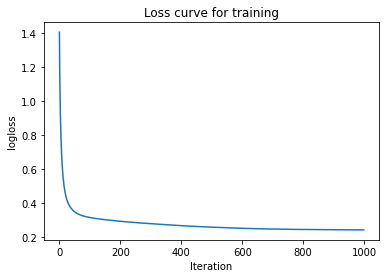

In [100]:
nn.plot_loss()

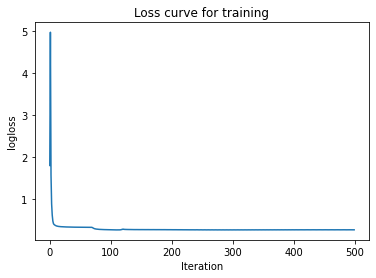

In [103]:
nn = NeuralNet(layers=[13,10,1], learning_rate=0.01, iterations=500) # create the NN model
nn.fit(xtrain, ytrain)
nn.plot_loss()

In [104]:
train_pred = nn.predict(xtrain)
test_pred = nn.predict(xtest)

print('train accuracy is {}'.format(nn.acc(ytrain, train_pred)))
print('test accuracy is {}'.format(nn.acc(ytest, test_pred)))


train accuracy is 88
test accuracy is 74
